In [46]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve,
    mean_absolute_error, mean_squared_error, r2_score
)


In [47]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [48]:
df = pd.read_csv("student_performance.csv")

X = df.drop("Pass", axis=1)
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [49]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

joblib.dump(baseline_model, "baseline_model.pkl")
print("Baseline model saved")


Baseline model saved


In [50]:
tuned_model = LogisticRegression(
    max_iter=1000,
    C=0.5,
    solver="liblinear"
)
tuned_model.fit(X_train, y_train)

joblib.dump(tuned_model, "tuned_model.pkl")
print("Tuned model saved")


Tuned model saved


In [51]:
y_pred_base = baseline_model.predict(X_test)
y_prob_base = baseline_model.predict_proba(X_test)[:, 1]

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
print("Baseline F1:", f1_score(y_test, y_pred_base))
print("Baseline ROC-AUC:", roc_auc_score(y_test, y_prob_base))


Baseline Accuracy: 1.0
Baseline F1: 1.0
Baseline ROC-AUC: 1.0


In [52]:
# Classification dataset alias
X_cls = X
y_cls = y


In [53]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    baseline_model,
    
    X_cls,
    y_cls,
    cv=skf,
    scoring="accuracy"
)

print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())



CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [54]:
y_pred_tuned = tuned_model.predict(X_test)
y_prob_tuned = tuned_model.predict_proba(X_test)[:, 1]

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Precision:", precision_score(y_test, y_pred_tuned))
print("Tuned Recall:", recall_score(y_test, y_pred_tuned))
print("Tuned F1:", f1_score(y_test, y_pred_tuned))
print("Tuned ROC-AUC:", roc_auc_score(y_test, y_prob_tuned))


Tuned Accuracy: 1.0
Tuned Precision: 1.0
Tuned Recall: 1.0
Tuned F1: 1.0
Tuned ROC-AUC: 1.0


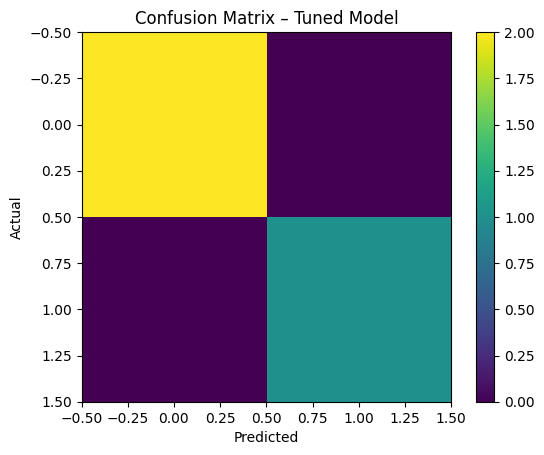

In [55]:
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix – Tuned Model")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


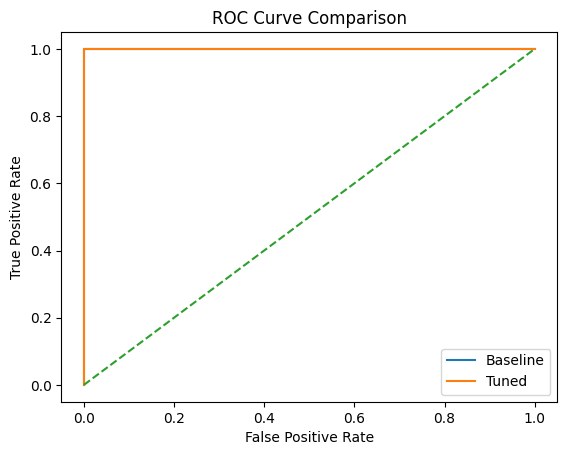

In [56]:
fpr_b, tpr_b, _ = roc_curve(y_test, y_prob_base)
fpr_t, tpr_t, _ = roc_curve(y_test, y_prob_tuned)

plt.figure()
plt.plot(fpr_b, tpr_b, label="Baseline")
plt.plot(fpr_t, tpr_t, label="Tuned")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [57]:
df_reg = pd.read_csv("retail_regression.csv")

X_reg = df_reg.drop("Profit", axis=1)
y_reg = df_reg["Profit"]

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [58]:
# Train-test split for classification dataset
from sklearn.model_selection import train_test_split

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [59]:
# Predict using the SAME features the model was trained on
y_pred = tuned_model.predict(X_test_cls)

print("Predictions generated successfully")


Predictions generated successfully


In [60]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_cls, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred))



Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [61]:
# comparison

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

# Base model predictions
y_pred_base = baseline_model.predict(X_test_cls)
y_prob_base = baseline_model.predict_proba(X_test_cls)[:, 1]

# Tuned model predictions
y_pred_tuned = tuned_model.predict(X_test_cls)
y_prob_tuned = tuned_model.predict_proba(X_test_cls)[:, 1]

# Comparison table
comparison = pd.DataFrame({
    "Model": ["Baseline", "Tuned"],
    "Accuracy": [
        accuracy_score(y_test_cls, y_pred_base),
        accuracy_score(y_test_cls, y_pred_tuned)
    ],
    "F1 Score": [
        f1_score(y_test_cls, y_pred_base),
        f1_score(y_test_cls, y_pred_tuned)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test_cls, y_prob_base),
        roc_auc_score(y_test_cls, y_prob_tuned)
    ]
})

comparison


,Model,Accuracy,F1 Score,ROC-AUC
0,Baseline,1.0,1.0,1.0
1,Tuned,1.0,1.0,1.0
